The following project was done to classify and predict the different fashion items using a neural network. The dataset was obtained from kaggle(https://www.kaggle.com/datasets/zalando-research/fashionmnist)
According to Kaggle, fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. The original MNIST dataset contains a lot of handwritten digits.

Labels in the dataset:

0 T-shirt/top

1 Trouser

2 Pullover

3 Dress

4 Coat

5 Sandal

6 Shirt

7 Sneaker

8 Bag

9 Ankle boot

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt


In [ ]:
fash_data= keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test)= fash_data.load_data() #already dataset is split as test (60k) and train (10k) by keras. so no need to do split by outselves

# X_train will have images and y_train will have labels (10 different t-shirt labels)


In [ ]:
X_train_full.shape #shows 3 values because the table has 60k different rows of data and each image is 28*28 pixels, therefore for one type of label there will 784 datapoints (784 columns)

(60000, 28, 28)

In [ ]:
X_train_full.dtype #for uint8 type of data the min-max values will be btw 0 and 255. this is not great as we need to normalize for big values

dtype('uint8')

In [ ]:
#split train data into validation data also

X_val = X_train_full[:5000]
X_train = X_train_full[5000:]  # if you want to extract specific columns, you can use additional indices within the slicing notation. For example, X_train[:5000, 0:3] would extract the first 5000 rows and the first 3 columns
X_val = X_val /255
X_train = X_train /255
X_test = X_test /255

y_val, y_train = y_train_full[:5000], y_train_full[5000:]


In [ ]:
print(X_train.shape)
print (X_val.shape)
print(X_test.shape)

(55000, 28, 28)
(5000, 28, 28)
(10000, 28, 28)


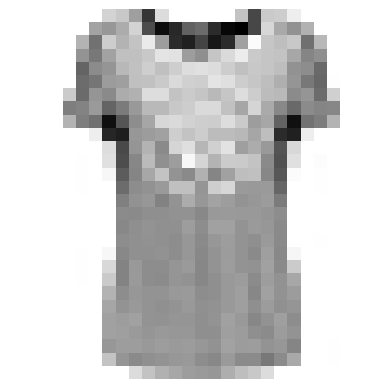

In [ ]:
plt.imshow(X_train[1], cmap='binary') #This code will create a image where pixels with a value of 0 will be black and pixels with a value of 1 will be white.
plt.axis('off')
plt.show()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense



model = Sequential([
    Flatten(input_shape=(28,28)),
    Dense (500, activation ='relu', name = 'L1'),
    Dense (200, activation ='relu', name = 'L2'),
    Dense (10, activation ='softmax', name = 'L3')   #no. of neurons in o/p layer shd be same as no. of class to compute prob(Y/given=1,2,3...9)
])

In [ ]:
np.random.seed(42) #this seeding is done to fix the intialization at same point everytime we run the code fro first

tf.random.set_seed(42)


In [ ]:
model.layers

In [ ]:
model.summary() #number of weights in first layer is 300 (w-values) * 784 (input) + 300 bias = 235500

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 L1 (Dense)                  (None, 500)               392500    
                                                                 
 L2 (Dense)                  (None, 200)               100200    
                                                                 
 L3 (Dense)                  (None, 10)                2010      
                                                                 
Total params: 494710 (1.89 MB)
Trainable params: 494710 (1.89 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
h = model.layers[1]


weight, bias = h.get_weights() #we are onle getting weights of 1st hidden layer with 300 neurons

weight
weight.shape #so weights for individual neuron in a layer are placed in columns. each row has the weights for one of the 784 input numbers

(784, 500)

In [ ]:
bias #printing bias from above command
bias.shape

(500,)

In [ ]:
from keras.regularizers import l1
#even these compile arguments are hyper paramters. we are also getting the accuracy metrics
# Accuracy = (Number of Correct Predictions) / (Total Number of Predictions)
model.compile (loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [ ]:
#fitting the data and training the model

history = model.fit(X_train, y_train, epochs= 20, validation_data= (X_val, y_val))

Epoch 1/20
1719/1719 [==============================] - 17s 10ms/step - loss: 0.4762 - accuracy: 0.8273 - val_loss: 0.3591 - val_accuracy: 0.8688
Epoch 2/20
1719/1719 [==============================] - 15s 9ms/step - loss: 0.3598 - accuracy: 0.8678 - val_loss: 0.4023 - val_accuracy: 0.8552
Epoch 3/20
1719/1719 [==============================] - 15s 9ms/step - loss: 0.3263 - accuracy: 0.8784 - val_loss: 0.3228 - val_accuracy: 0.8824
Epoch 4/20
1719/1719 [==============================] - 15s 9ms/step - loss: 0.3002 - accuracy: 0.8884 - val_loss: 0.3050 - val_accuracy: 0.8888
Epoch 5/20
1719/1719 [==============================] - 16s 10ms/step - loss: 0.2822 - accuracy: 0.8942 - val_loss: 0.3065 - val_accuracy: 0.8844
Epoch 6/20
1719/1719 [==============================] - 17s 10ms/step - loss: 0.2668 - accuracy: 0.9003 - val_loss: 0.3427 - val_accuracy: 0.8822
Epoch 7/20
1719/1719 [==============================] - 15s 9ms/step - loss: 0.2538 - accuracy: 0.9052 - val_loss: 0.3139 - val

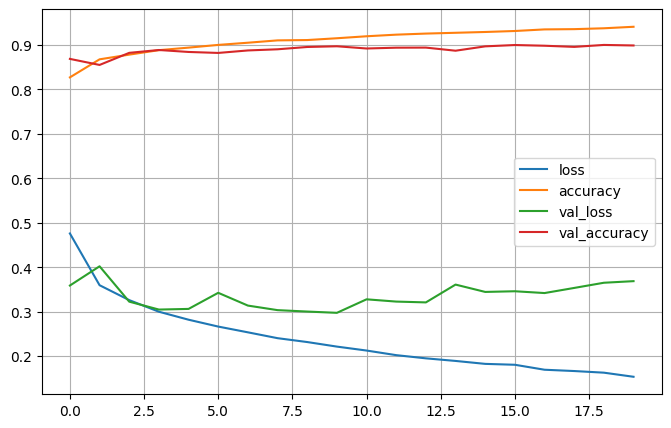

In [ ]:
# to make graphs easily to visualize losses, we can convery the "history" variable to pandas dataframe. Leverage Pandas:

#Convert the history object to a Pandas DataFrame for potential performance improvements and easier data manipulation.
#Use DataFrame indexing and slicing operations to extract data.

import pandas as pd
pd.DataFrame(history.history).plot(figsize=(8,5)) #the history.history takes the dictionary-type result data and puts it as data frame for plotting
#if model.fit()is stored in variable called "ash", then above code becomes pd.Dataframe(ash.history), so that history is an attribute
plt.grid(True)
#plt.gca().set_ylim(0,1). this sets the y axis between 0 and 1
plt.show()

#result shows may be we have hit mix limit. more than this will lead to overfitting as val loss has stopped. if val_loss keeps increasing after decreasing then overfitting is happening


In [ ]:
history.history.keys() #prints the dictonary keys

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
#testing with new test data

model.evaluate(X_test, y_test)


313/313 [==============================] - 1s 4ms/step - loss: 0.3797 - accuracy: 0.8915


[0.3796856105327606, 0.8914999961853027]

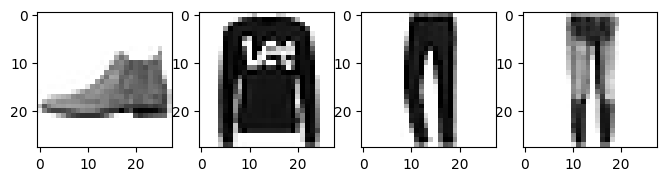

In [ ]:
X_new= X_test [:4] #take only first 4 images of test data

plt.figure(figsize= (8,2))
for index, image in enumerate(X_new):  #enumerate yields pairs of (index, value) for each item in the iterable you provided.
    plt.subplot(1,4,index+1)
    plt.imshow(image, cmap='binary')
    plt.axis('on') #shows as axis in graph
plt.show()


In [ ]:
y_pred=np.argmax(model.predict(X_new), axis=1) #argmax is used to take the index which has the highest softmax probability. that index will correpsond to the label in y
y_pred
class_names =("T-shirt/top", "Trouser", "Pullover", "Shirt", "Dress", "Sandal", "Sneaker","Coat", "Bag", "Ankle boot")
np.array(class_names)[y_pred]

1/1 [==============================] - 0s 76ms/step


array(['Ankle boot', 'Pullover', 'Trouser', 'Trouser'], dtype='<U11')